<a href="https://colab.research.google.com/github/nikhilnair31/ST380/blob/main/Intro_to_ML_Summer_Group_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to ML Summer Group Project - Black Friday Sales
[Kaggle Dataset Link](https://www.kaggle.com/datasets/cerolacia/black-friday-sales-prediction?datasetId=852005&sortBy=voteCount)

## About Dataset
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data
- User_ID: Unique identifier of shopper.
- Product_ID: Unique identifier of product. (No key given)
- Gender: Sex of shopper.
- Age: Age of shopper split into bins.
- Occupation: Occupation of shopper. (No key given)
- City_Category: Residence location of shopper. (No key given)
- Stay_In_Current_City_Years: Number of years stay in current city.
- Marital_Status: Marital status of shopper.
- Product_Category_1: Product category of purchase.
- Product_Category_2: Product may belong to other category.
- Product_Category_3: Product may belong to other category.
- Purchase: Purchase amount in dollars.

## Import Base Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

In [ ]:
sales_df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/bf_train.csv')

In [ ]:
sales_df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
sales_df1.sort_values('Purchase', ascending=False).head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,NaN,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,NaN,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,NaN,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,16.0,NaN,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,15.0,NaN,23960


In [ ]:
sales_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
sales_df1['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
print(f"shape: {sales_df1.shape}\n\nnulls:\n{sales_df1.isnull().sum()}")

shape: (550068, 12)

nulls:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [ ]:
sales_df1[(sales_df1['Product_Category_1'].astype(float) == 7)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
208,1000036,P00110142,M,26-35,3,B,0,0,7,NaN,NaN,16280
368,1000059,P00131942,F,51-55,1,B,4+,1,7,NaN,NaN,8784
731,1000139,P00020142,F,26-35,20,C,2,0,7,NaN,NaN,21002
900,1000161,P00024042,M,46-50,16,C,4+,1,7,NaN,NaN,20915
985,1000169,P00279642,M,26-35,7,B,3,0,7,NaN,NaN,8466
...,...,...,...,...,...,...,...,...,...,...,...,...
545415,1005963,P00131942,M,26-35,15,A,0,0,7,NaN,NaN,20646
545417,1005964,P00159142,M,18-25,5,B,1,0,7,NaN,NaN,20448
545420,1005964,P00248642,M,18-25,5,B,1,0,7,NaN,NaN,20534
545482,1005976,P00110442,F,26-35,1,C,2,0,7,NaN,NaN,16613


In [ ]:
sales_df1_pc1_8 = sales_df1[(sales_df1['Product_Category_1'].astype(float) == 8)]
sales_df1_pc1_8

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872
...,...,...,...,...,...,...,...,...,...,...,...,...
545891,1006037,P00051442,F,46-50,1,C,4+,0,8,17.0,NaN,9892
545903,1006039,P00178542,F,46-50,0,B,4+,1,8,13.0,NaN,7796
545906,1006040,P00101942,M,26-35,6,B,2,0,8,17.0,NaN,5948
545910,1006040,P00184342,M,26-35,6,B,2,0,8,NaN,NaN,9855


In [ ]:
sales_df1_pc1_8_pc2_na = sales_df1_pc1_8[sales_df1_pc1_8['Product_Category_2'].isna()]
sales_df1_pc1_8_pc2_na

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872
...,...,...,...,...,...,...,...,...,...,...,...,...
545871,1006036,P00029242,F,26-35,15,B,4+,1,8,NaN,NaN,7951
545874,1006036,P00115542,F,26-35,15,B,4+,1,8,NaN,NaN,8089
545877,1006036,P00326442,F,26-35,15,B,4+,1,8,NaN,NaN,5882
545910,1006040,P00184342,M,26-35,6,B,2,0,8,NaN,NaN,9855


In [ ]:
sales_df1['Product_Category_2'].value_counts().sort_values()

7.0       626
18.0     2770
3.0      2884
10.0     3043
12.0     5528
9.0      5693
13.0    10531
17.0    13320
11.0    14134
6.0     16466
4.0     25677
5.0     26235
15.0    37855
16.0    43255
2.0     49217
14.0    55108
8.0     64088
Name: Product_Category_2, dtype: int64

## Processing

### Clean Data

In [ ]:
df = sales_df1.drop(["User_ID", "Product_Category_2", "Product_Category_3"], axis=1)
df_encoded = df

In [ ]:
# print(f"mode: {df_encoded['Product_Category_2'].mode()[0]}")
# print(f"mean: {df_encoded['Product_Category_2'].mean()}")

In [ ]:
# Fill NA with mean/mode
# df_encoded['Product_Category_2'].fillna(df_encoded['Product_Category_2'].mode()[0],inplace=True)
# df_encoded['Product_Category_3'].fillna(df_encoded['Product_Category_3'].mode()[0],inplace=True)

# change column type
# df_encoded['Product_Category_2'] = df_encoded['Product_Category_2'].astype(int)
# df_encoded['Product_Category_3'] = df_encoded['Product_Category_3'].astype(int)

In [ ]:
df_encoded.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8370
1,P00248942,F,0-17,10,A,2,0,1,15200
2,P00087842,F,0-17,10,A,2,0,12,1422
3,P00085442,F,0-17,10,A,2,0,12,1057
4,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
print(f"shape: {df_encoded.shape}\n\nnulls:\n{df_encoded.isnull().sum()}")

shape: (550068, 9)

nulls:
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 37.8+ MB


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

cols_to_embed = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Label Encoding
for column in cols_to_embed[0:]:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# One Hot Encoding
# df_encoded = pd.get_dummies(df, columns=cols_to_embed[1:])

In [ ]:
df_encoded.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,672,0,0,10,0,2,0,3,8370
1,2376,0,0,10,0,2,0,1,15200
2,852,0,0,10,0,2,0,12,1422
3,828,0,0,10,0,2,0,12,1057
4,2734,1,6,16,2,4,0,8,7969


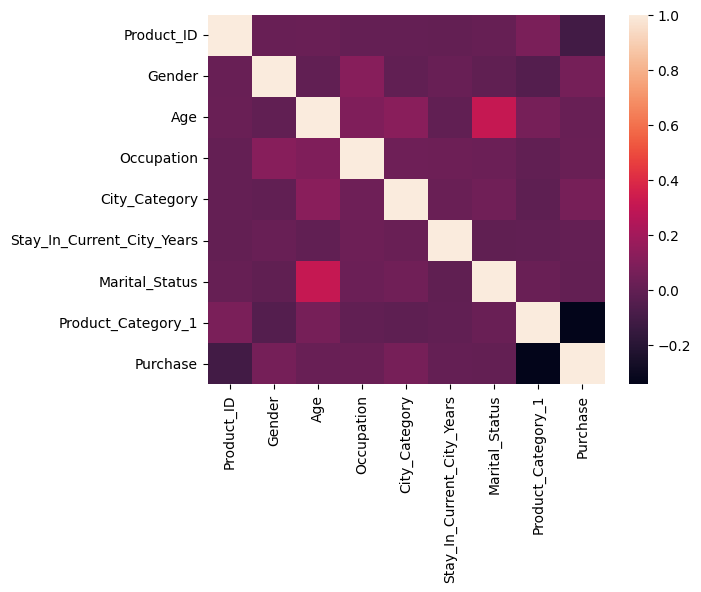

In [ ]:
import seaborn as sns
sns.heatmap(df_encoded.corr(), annot=False)
plt.savefig("my_plot.png",bbox_inches='tight')

### Split and Scale Data

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop('Purchase', axis=1)
y = df_encoded['Purchase']

In [ ]:
# Scaling (Not needed with tree models)
# scl = StandardScaler()
# col = X.columns
# ind = X.index
# colum = df_encoded.columns
# index = df_encoded.index
# X = scl.fit_transform(X)
# X = pd.DataFrame(X, columns=col, index=ind)
# df_encoded = scl.fit_transform(df_encoded)
# df_encoded = pd.DataFrame(df_encoded, columns=colum, index=index)

In [ ]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
# kf = KFold(n_splits=5, random_state=1, shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,672,0,0,10,0,2,0,3
1,2376,0,0,10,0,2,0,1
2,852,0,0,10,0,2,0,12
3,828,0,0,10,0,2,0,12
4,2734,1,6,16,2,4,0,8


## Modelling

### Model Approaches

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

In [ ]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dtr_model = DecisionTreeRegressor(random_state = 42)

In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr_model = RandomForestRegressor(n_estimators=20, max_depth=25, n_jobs=-1, random_state=42)

In [ ]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor with GPU acceleration
xgb_model = xgb.XGBRegressor(
    tree_method='gpu_hist',
    learning_rate = 0.5,
    n_estimators = 400,
    min_child_weight=40,
    max_depth = 8,
    random_state=42
)

In [ ]:
# copy model
model = xgb_model

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for both the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the scores for both in-sample and out-of-sample predictions
# in sample
is_mse = mean_squared_error(y_train, y_train_pred)
is_rmse = np.sqrt(is_mse)
is_r2 = r2_score(y_train, y_train_pred)
# out of sample
os_mse = mean_squared_error(y_test, y_test_pred)
os_rmse = np.sqrt(os_mse)
os_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"In-Sample\nMSE: {is_mse}\nRMSE: {is_rmse}\nR2: {is_r2}\n\nOut-Of-Sample\nMSE: {os_mse}\nRMSE: {os_rmse}\nR2: {os_r2}")

In-Sample
MSE: 5848072.812194407
RMSE: 2418.2788946261776
R2: 0.7684604812448188

Out-Of-Sample
MSE: 7524210.587750168
RMSE: 2743.029454408058
R2: 0.7005429952247562


### Model Tuning

In [ ]:
param_grid = {
    'learning_rate': [0.07, 0.1, 0.13],
    'n_estimators': [500, 500, 400],
    'max_depth': [15, 12, 10]
}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor with GPU acceleration
xgb_model = xgb.XGBRegressor(tree_method='gpu_hist')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)

# Fit the data to find the best parameters
grid_search.fit(X, y)  # X: input features, y: target variable

# Get all combinations of parameters and their corresponding scores
results = grid_search.cv_results_

# Print all combinations' scores
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("Parameters:", params)
    print("Score:", mean_score)
    print()

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

KeyboardInterrupt: ignored

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor with GPU acceleration
xgb_model = xgb.XGBRegressor(tree_method='gpu_hist')

# Create GridSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=5,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42
)

# Fit the data to find the best parameters
random_search.fit(X_train, y_train)  # X: input features, y: target variable

# Get all combinations of parameters and their corresponding scores
results = random_search.cv_results_

# Print all combinations' scores
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("Parameters:", params)
    print("Score:", mean_score)
    print()

# Get the best parameters and best score
best_model = random_search.best_estimator_

# Print the best parameters and best score
print("Best Model:", best_model)

### Feature Importance

Product_Category_1: 0.8636268973350525
Product_ID: 0.040648337453603745
City_Category: 0.020258286967873573
Age: 0.017553867772221565
Gender: 0.016222739592194557
Occupation: 0.015335445292294025
Stay_In_Current_City_Years: 0.01457412913441658
Marital_Status: 0.011780302040278912


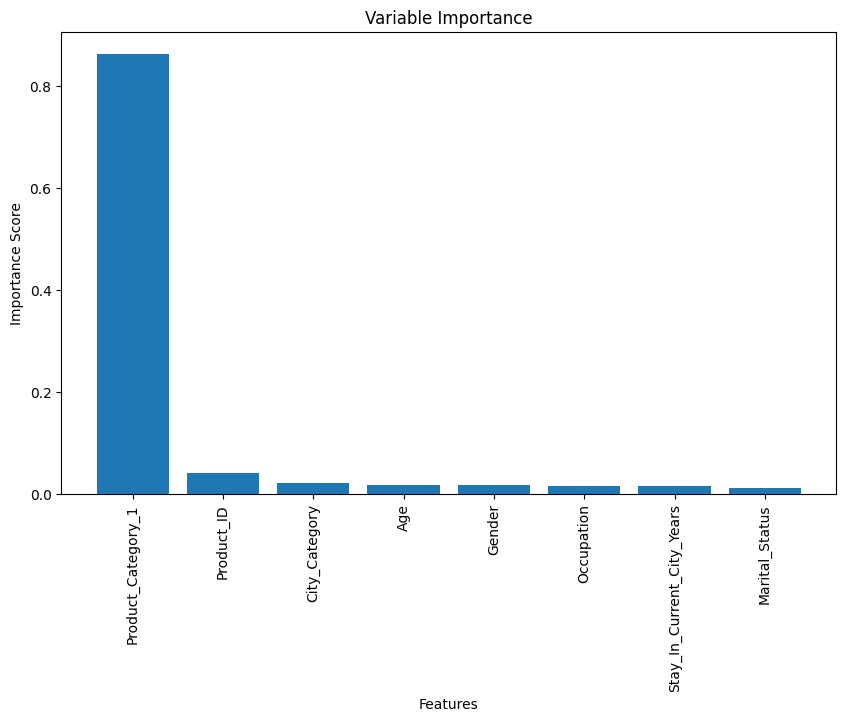

In [ ]:
import matplotlib.pyplot as plt

# Get the variable importance scores
importance_scores = model.feature_importances_

# Get the names of the input features
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Sort the importance scores and feature names in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the variable importance scores and feature names
for score, feature_name in zip(sorted_scores, sorted_feature_names):
    print(f"{feature_name}: {score}")

# Plot the variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Variable Importance')
plt.show()

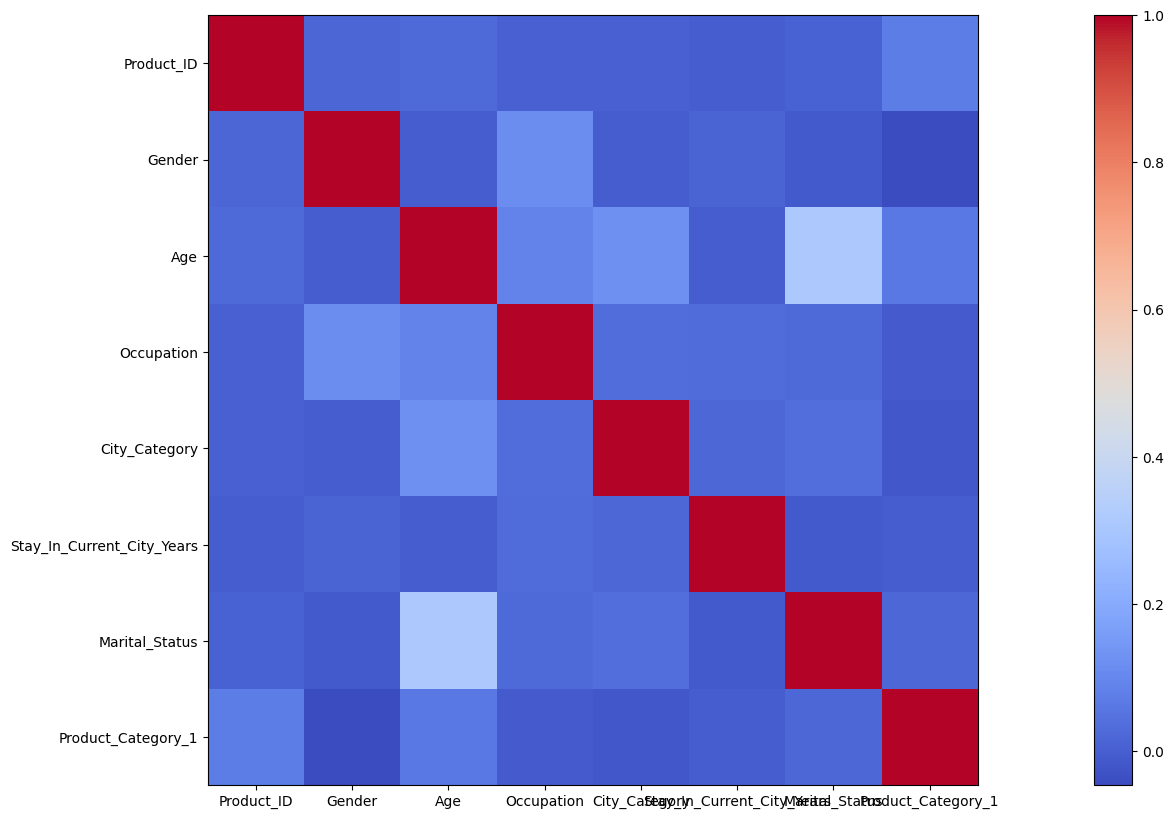

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Set the figure size
plt.figure(figsize=(30, 10))

# Create a heatmap using the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add a colorbar
plt.colorbar()

# Set the tick labels and show the plot
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()